In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import os

os.environ["KMP_DUPLICATE_LIB_OK"]='TRUE'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.keras.backend.set_floatx('float64')
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]

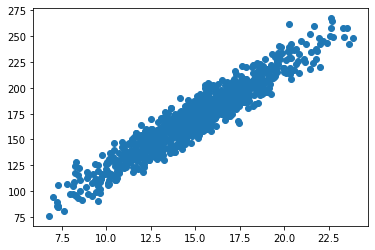

In [3]:
x = np.random.normal(loc=15, scale=3, size=(1000, 1))
x = np.reshape(x, (-1, 1))

y = 10*x + 20
y += np.random.normal(loc=1, scale=10, size=x.shape)
y = np.reshape(y, (-1, 1))

plt.scatter(x, y)
plt.show()

In [8]:
from tensorflow.keras import layers


class Linear_regression(layers.Layer):

    def __init__(self, units=32):
        super(Linear_regression, self).__init__()
        
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(initial_value=w_init(shape=(units, 1), 
                                                  dtype=tf.dtypes.float64),
                             trainable=True)
        
        b_init = tf.random_normal_initializer()
        self.b = tf.Variable(initial_value=b_init(shape=(1, 1),
                                                  dtype=tf.dtypes.float64),
                             trainable=True)

        
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b
        
        

lr = Linear_regression(units=1)
lr(x)

<tf.Tensor: shape=(1000, 1), dtype=float64, numpy=
array([[-0.5429364 ],
       [-0.73621118],
       [-0.80219616],
       [-0.88197182],
       [-0.61036345],
       [-0.91154557],
       [-0.65951589],
       [-0.69828294],
       [-0.84867455],
       [-0.97840587],
       [-0.91394435],
       [-0.90315821],
       [-1.00628457],
       [-0.96656285],
       [-0.78667428],
       [-0.77635873],
       [-0.56095305],
       [-0.89340565],
       [-0.51694988],
       [-0.55827843],
       [-0.74951113],
       [-0.50291146],
       [-0.46712082],
       [-0.88107937],
       [-0.86349643],
       [-0.88262118],
       [-0.81978959],
       [-0.74625465],
       [-1.16849825],
       [-0.79909704],
       [-0.64709861],
       [-0.72478494],
       [-0.76873187],
       [-0.7303606 ],
       [-0.82253847],
       [-1.10515572],
       [-0.79610954],
       [-0.79434252],
       [-0.7557207 ],
       [-0.76582252],
       [-0.69049595],
       [-0.73960577],
       [-0.771896  ],
   

In [5]:
lr = Linear_regression(units=1)
loss = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

In [7]:
model = tf.keras.Sequential(layers=[Linear_regression(units=1)])
model.compile(optimizer=optimizer, loss=loss)

In [ ]:
history = model.fit(x, y, batch_size=10000, epochs=20)

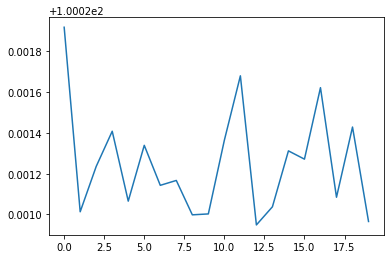

In [15]:
loss = history.history["loss"]

plt.plot(range(len(loss)), loss)
plt.show()

In [16]:
x_line = np.array([[3.61914402],
                   [25.47281372]])
y_line = model.predict(x_line)


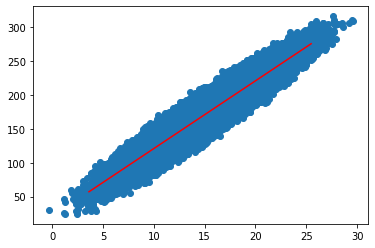

In [17]:
plt.scatter(x, y)
plt.plot(x_line, y_line, color="red")
plt.show()